In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm

# 데이터 확인

In [3]:
df = pd.read_csv("C:\DL\DSA_features.csv")

In [4]:
df


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
print(df['activity'].unique()) # 해당 열에서 고유한 클래스 추출
print(df['activity'].unique().shape) # 19개 확인

['sitting' 'standing' 'lyingBack' 'lyingRigh' 'ascendingStairs'
 'decendingStairs' 'standingInElevatorStill' 'movingInElevator'
 'walkingLot' 'walkingTreadmillFlat' 'walkingTreadmillIncline'
 'runningTreadmill' 'stepper' 'crossTrainer' 'cyclingHorizontal'
 'cyclingVertical' 'rowing' 'jumping' 'basketBall']
(19,)


In [7]:

df['activity'].value_counts() # 각 클래스 별로 데이터 개수 확인

sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

Text(0, 0.5, 'Count')

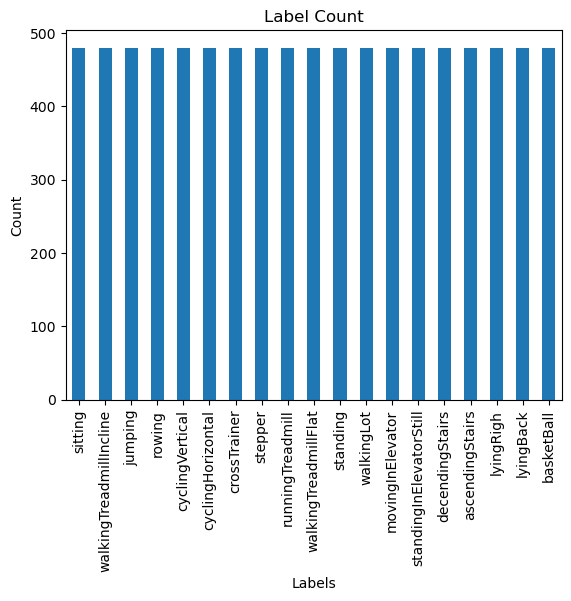

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [9]:
#데이터 나누기(pandas filter의 regex는 정규 표현식으로 열이나 행 이름을 필터링
df_RA = df.filter(regex='RA_') #RA로 시작하는 모든 열 이름 선택
df_LA = df.filter(regex='LA_') 

In [10]:
#4번쨰 열에 activity 새로운 열 삽입
df_RA.insert(3, 'activity', df['activity'])

In [11]:

df_LA.insert(3, 'activity', df['activity'])

In [12]:

df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [13]:

df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [14]:
df_LA['activity'].value_counts()

sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

In [15]:
df_RA['activity'].value_counts()

sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: activity, dtype: int64

# 데이터 전처리

In [16]:

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7576\59498690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7576\59498690.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [17]:
df_LA['activity'].value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

In [18]:
df_RA['activity'].value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

- train,target 설정

In [19]:
# target값 설정
df_RA_Y=df_RA['activity'] 

In [20]:
# train값 설정
df_RA_X=df_RA.drop('activity',axis=1) 
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


- train,test 분리

In [21]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X, 
                                                    df_RA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [22]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

0    12
1    12
2    12
3    12
4    12
Name: activity, dtype: int32

In [23]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


In [24]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X, 
                                                    df_LA_Y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [25]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [26]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

# LSTM
1. 데이터 넘파이 배열로 변환 후 X,Y클래스를 하나로 합쳐 하나의 배열 만들기
2. 시퀀스 데이터를 함수를 통해 전처리
3. 카테고리를 확률로 표현하기 위해 원-핫 인코딩 적용
4. 시계열 데이터 처리 딥러닝 모델(LSTM,RNN 등)을 위해 입력과 출력 차원을 정의


In [27]:
#시계열 데이터를 n_steps길이의 시퀀스로 나누고 그 시퀀스동안 가장 빈번하게 나온 레이블을 대표 레이블로 선택
#주로 LSTM,RNN에 많이 쓰이는 방법
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

1. 넘파이 배열 변환 후 하나의 데이터로 변환(시계열 데이터 전처리 함수를 위해)

In [28]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA) # 데이터는 아작 판다스 구조이기 때문에 넘파이 배열로 변
train_set_RA = np.c_[X_train_RA, y_train_array_RA] # 열방향으로 합쳐 하나의 배열로 변환

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

2. 시계열 데이터 전처리

In [29]:
n_step = 3 

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [30]:

# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [31]:
n_step = 3 

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


3. 원-핫 인코딩 적용(레이블을 이진 벡터로 변환하여 각 클래스에 대한 확률 나타냄)

In [32]:
from keras.utils import to_categorical
#원 핫 인코딩(여러 활동중 어떤 활동이 해당되는지 확률처럼 나타낼 수 있다.)-> 즉, 확률로 나타내기 위해 사용
#원 핫 인코딩은 다중 클래스 레이블을 카테고리 값으로 변환하는 작
# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

(6838, 19)
(2278, 19)


In [33]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


4. 모델을 위한 입력,출력 차원정의

In [34]:
# Produce variables for CNN input/output shape

n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


# Model 정의 및 RA 훈련

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [36]:

# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 3s 7ms/step - loss: 2.0383 - accuracy: 0.3515 - val_loss: 1.3574 - val_accuracy: 0.5599
Epoch 2/20
193/193 [==============================] - 1s 5ms/step - loss: 1.0301 - accuracy: 0.6687 - val_loss: 0.9155 - val_accuracy: 0.7485
Epoch 3/20
193/193 [==============================] - 1s 5ms/step - loss: 0.7199 - accuracy: 0.7870 - val_loss: 0.8420 - val_accuracy: 0.7880
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.5677 - accuracy: 0.8354 - val_loss: 0.7458 - val_accuracy: 0.8114
Epoch 5/20
193/193 [==============================] - 1s 6ms/step - loss: 0.4770 - accuracy: 0.8612 - val_loss: 0.6944 - val_accuracy: 0.8246
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3914 - accuracy: 0.8827 - val_loss: 0.7347 - val_accuracy: 0.7997
Epoch 7/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.9054 - val_loss: 0.6107 - val_accuracy: 0.8596
Epoch 

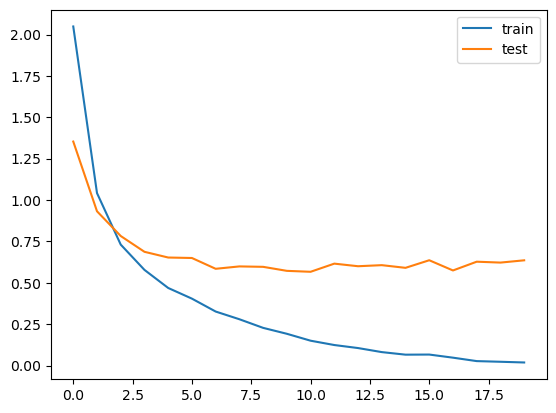

In [38]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

#### 훈련셋 98, 테스트 셋 86 으로 과대적합 발생

In [39]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 [==============================] - 1s 3ms/step - loss: 0.0856 - accuracy: 0.9813


[0.08558233082294464, 0.9812811017036438]

In [40]:

model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.8630


[0.6325510144233704, 0.8630377650260925]

#### confusion_matrix(혼돈행렬) 확인

72/72 [==============================] - 1s 3ms/step
Confusion Matrix


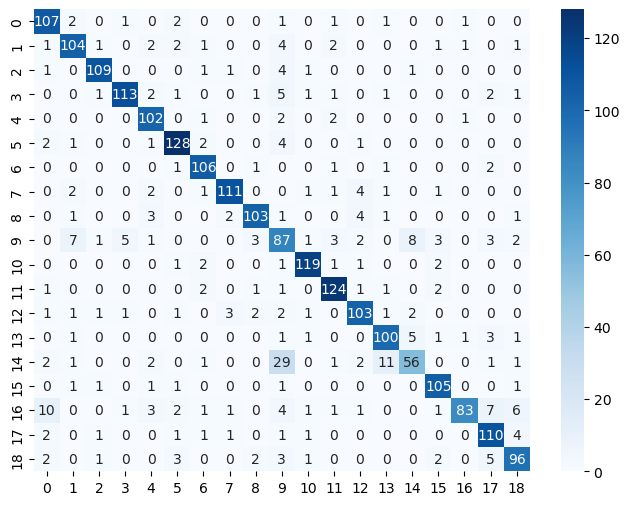

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [39]:

base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file="C:\DL\RA_Model.h5"
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.8701
model saved at  C:\DL\RA_Model.h5
Accuracy >87.006146
Base Loss >0.66


# LA 훈련

In [40]:

# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 19)                2451      
                                                                 
Total params: 112,659
Trainable params: 112,659
Non-trainable params: 0
_________________________________________________________________


In [42]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 [==============================] - 3s 7ms/step - loss: 2.0228 - accuracy: 0.3700 - val_loss: 1.2282 - val_accuracy: 0.5877
Epoch 2/20
193/193 [==============================] - 1s 5ms/step - loss: 0.9588 - accuracy: 0.6987 - val_loss: 0.8543 - val_accuracy: 0.7529
Epoch 3/20
193/193 [==============================] - 1s 5ms/step - loss: 0.6826 - accuracy: 0.8022 - val_loss: 0.6987 - val_accuracy: 0.7968
Epoch 4/20
193/193 [==============================] - 1s 5ms/step - loss: 0.5088 - accuracy: 0.8591 - val_loss: 0.5659 - val_accuracy: 0.8480
Epoch 5/20
193/193 [==============================] - 1s 5ms/step - loss: 0.4213 - accuracy: 0.8801 - val_loss: 0.5296 - val_accuracy: 0.8655
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3518 - accuracy: 0.8994 - val_loss: 0.5433 - val_accuracy: 0.8582
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3064 - accuracy: 0.9100 - val_loss: 0.5325 - val_accuracy: 0.8582
Epoch 

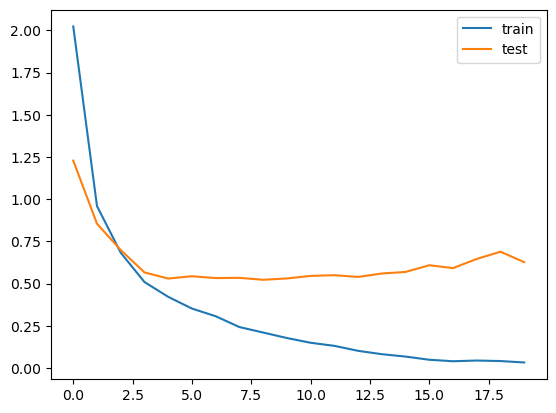

In [43]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [44]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9852


[0.07757793366909027, 0.9852296113967896]

In [45]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.8845


[0.5749820470809937, 0.8845478296279907]

72/72 [==============================] - 1s 3ms/step
Confusion Matrix


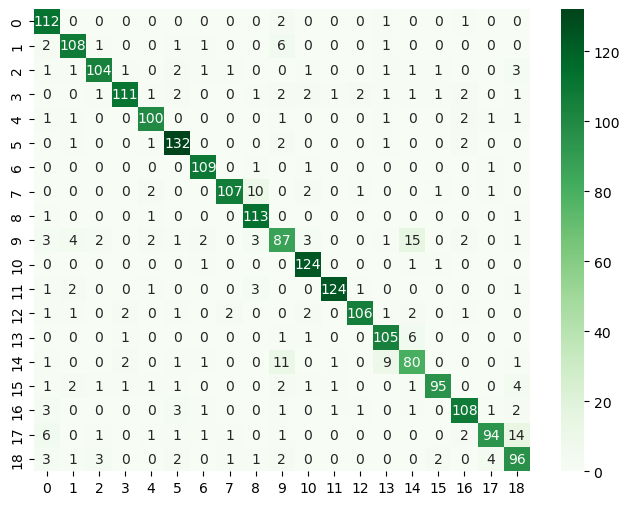

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

In [47]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

model_file2="C:\DL\RA_Model.h5"
  
tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.8845
model saved at  C:\DL\RA_Model.h5
Accuracy >88.454783
Base Loss >0.57


# Pre-trained Model

In [48]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [49]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

In [50]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 1s 2ms/step - loss: 0.5750 - accuracy: 0.8845


[0.5749820470809937, 0.8845478296279907]

In [51]:
#### LA에 대한 모델을 불러와서 RA에 대한 점수가 낮음

In [52]:

base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 5.9261 - accuracy: 0.2388


[5.926120281219482, 0.23880596458911896]

In [53]:

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [54]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [55]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 19)                4883      
                                                                 
Total params: 148,115
Trainable params: 37,907
Non-trainable params: 110,208
_________________________________________________________________


In [56]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,False
1,<keras.layers.core.dense.Dense object at 0x000...,dense_2,False
2,<keras.layers.core.dense.Dense object at 0x000...,dense_4,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_5,True


In [57]:

history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 5ms/step - loss: 1.8310 - accuracy: 0.4352 - val_loss: 1.5225 - val_accuracy: 0.5015
Epoch 2/20
193/193 [==============================] - 1s 3ms/step - loss: 1.4466 - accuracy: 0.5367 - val_loss: 1.4001 - val_accuracy: 0.5658
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 1.3329 - accuracy: 0.5717 - val_loss: 1.2937 - val_accuracy: 0.5833
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 1.2525 - accuracy: 0.5981 - val_loss: 1.2971 - val_accuracy: 0.5731
Epoch 5/20
193/193 [==============================] - 1s 4ms/step - loss: 1.2116 - accuracy: 0.6115 - val_loss: 1.2502 - val_accuracy: 0.5950
Epoch 6/20
193/193 [==============================] - 1s 3ms/step - loss: 1.1532 - accuracy: 0.6258 - val_loss: 1.2229 - val_accuracy: 0.6023
Epoch 7/20
193/193 [==============================] - 1s 3ms/step - loss: 1.1121 - accuracy: 0.6358 - val_loss: 1.2061 - val_accuracy: 0.6096
Epoch 

In [58]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 2ms/step - loss: 1.1753 - accuracy: 0.6247


[1.1753191947937012, 0.6246707439422607]

# Fine Tunning

In [59]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [60]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_2,True
2,<keras.layers.core.dense.Dense object at 0x000...,dense_4,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_5,True


In [61]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 4s 7ms/step - loss: 0.7153 - accuracy: 0.7667 - val_loss: 0.8741 - val_accuracy: 0.7281
Epoch 2/20
193/193 [==============================] - 1s 5ms/step - loss: 0.4832 - accuracy: 0.8499 - val_loss: 0.8818 - val_accuracy: 0.7368
Epoch 3/20
193/193 [==============================] - 1s 5ms/step - loss: 0.3939 - accuracy: 0.8778 - val_loss: 0.7784 - val_accuracy: 0.7749
Epoch 4/20
193/193 [==============================] - 1s 5ms/step - loss: 0.2948 - accuracy: 0.9054 - val_loss: 0.6848 - val_accuracy: 0.8129
Epoch 5/20
193/193 [==============================] - 1s 5ms/step - loss: 0.2199 - accuracy: 0.9301 - val_loss: 0.7673 - val_accuracy: 0.7895
Epoch 6/20
193/193 [==============================] - 1s 5ms/step - loss: 0.1915 - accuracy: 0.9374 - val_loss: 0.6829 - val_accuracy: 0.8158
Epoch 7/20
193/193 [==============================] - 1s 5ms/step - loss: 0.1526 - accuracy: 0.9539 - val_loss: 0.6815 - val_accuracy: 0.8173
Epoch 

In [62]:

new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 0s 4ms/step - loss: 0.8885 - accuracy: 0.8521


[0.8884502053260803, 0.8520632386207581]

# RA model -> LA 

In [63]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

In [64]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

In [65]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 [==============================] - 1s 2ms/step - loss: 5.9261 - accuracy: 0.2388


[5.926120281219482, 0.23880596458911896]

In [66]:
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.8845


[0.5749820470809937, 0.8845478296279907]

In [67]:

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [68]:

# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [69]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               93696     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 19)                4883      
                                                                 
Total params: 148,115
Trainable params: 37,907
Non-trainable params: 110,208
_________________________________________________________________


In [70]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,False
1,<keras.layers.core.dense.Dense object at 0x000...,dense_2,False
2,<keras.layers.core.dense.Dense object at 0x000...,dense_6,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_7,True


In [71]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 3s 6ms/step - loss: 1.7986 - accuracy: 0.4438 - val_loss: 1.5296 - val_accuracy: 0.4971
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 1.4439 - accuracy: 0.5366 - val_loss: 1.3687 - val_accuracy: 0.5789
Epoch 3/20
193/193 [==============================] - 1s 3ms/step - loss: 1.3302 - accuracy: 0.5759 - val_loss: 1.3558 - val_accuracy: 0.5614
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 1.2555 - accuracy: 0.5916 - val_loss: 1.3138 - val_accuracy: 0.5848
Epoch 5/20
193/193 [==============================] - 1s 4ms/step - loss: 1.2041 - accuracy: 0.6081 - val_loss: 1.2639 - val_accuracy: 0.5906
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 1.1359 - accuracy: 0.6326 - val_loss: 1.2505 - val_accuracy: 0.5848
Epoch 7/20
193/193 [==============================] - 1s 4ms/step - loss: 1.0925 - accuracy: 0.6495 - val_loss: 1.2218 - val_accuracy: 0.6096
Epoch 

In [72]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 3ms/step - loss: 4.9116 - accuracy: 0.3424


[4.911583423614502, 0.34240561723709106]

In [73]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [74]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,True
1,<keras.layers.core.dense.Dense object at 0x000...,dense_2,True
2,<keras.layers.core.dense.Dense object at 0x000...,dense_6,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense_7,True


In [75]:
history3 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 [==============================] - 4s 8ms/step - loss: 0.3611 - accuracy: 0.8973 - val_loss: 0.7508 - val_accuracy: 0.8494
Epoch 2/20
193/193 [==============================] - 1s 6ms/step - loss: 0.0706 - accuracy: 0.9771 - val_loss: 0.8454 - val_accuracy: 0.8523
Epoch 3/20
193/193 [==============================] - 1s 7ms/step - loss: 0.0521 - accuracy: 0.9816 - val_loss: 0.9025 - val_accuracy: 0.8406
Epoch 4/20
193/193 [==============================] - 1s 7ms/step - loss: 0.0903 - accuracy: 0.9699 - val_loss: 0.8866 - val_accuracy: 0.8480
Epoch 5/20
193/193 [==============================] - 2s 8ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 1.0053 - val_accuracy: 0.8392
Epoch 6/20
193/193 [==============================] - 1s 7ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.9285 - val_accuracy: 0.8567
Epoch 7/20
193/193 [==============================] - 1s 6ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 1.0232 - val_accuracy: 0.8523
Epoch 

In [76]:
new_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.8889


[0.8941588401794434, 0.8889376521110535]